# Contents:
* [1. Import Libraries & Data](#import-libraries)
* [2. Explorotary Data Analysis (EDA)](#eda)
* [3. Data Preprocessing](#data-preprocessing)
* [4. Models Experiments](#models)

<a id="import-libraries"></a>
# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models 
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('./data/processed/properties_descriptors.csv')

In [3]:
data.head()

,set,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,Texpi,Skin thicknessj,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,t,139.1000,1.9100,387.0000,-4.0000,-2.0900,1.0000,4.0000,298.0000,0.1000,...,3.4083,2.2857,6.0000,373.7775,409.0118,503.2559,390.5658,173.6033,10.0000,8.5199
1,t,171.0300,2.9200,270.0000,-5.5862,-2.6662,0.0000,0.0000,305.0000,0.1280,...,3.1111,1.8000,6.0000,463.1751,476.6529,530.3165,392.2806,151.9746,8.0000,8.3385
2,t,171.0300,2.9200,270.0000,-5.5862,-2.6662,0.0000,0.0000,305.0000,0.0750,...,3.1111,1.8000,6.0000,463.1751,476.6529,530.3165,392.2806,151.9746,8.0000,8.3385
3,t,108.1000,1.0400,258.0000,-3.3979,-2.3579,1.0000,1.0000,298.0000,0.1000,...,3.1111,1.8000,6.0000,343.6480,360.6569,405.1711,284.5393,96.6676,8.0000,8.5570
4,t,184.2700,3.6700,183.0000,-6.1853,-2.5153,0.0000,2.0000,305.0000,0.1280,...,8.5917,7.1006,0.0000,588.8020,590.0260,630.0622,602.2702,511.2593,12.0000,8.5070


In [4]:
data.shape

(446, 231)

In [5]:
# no missing values
data.isna().sum().sum()

0

In [6]:
data.columns

Index(['set', 'MWa', 'logKowb', 'Mptc', 'LogSaqd', 'LogSoce', 'Hdf', 'Hag',
       'Texpi', 'Skin thicknessj',
       ...
       'Kier2', 'Kier3', 'naAromAtom', 'ATSp1', 'ATSp2', 'ATSp3', 'ATSp4',
       'ATSp5', 'nB', 'MolIP'],
      dtype='object', length=231)

<a id="data-preprocessing"></a>
# 3. Data Preprocessing

In [7]:
model_data = data.copy()

ohe = OneHotEncoder()
model_data['set'] = ohe.fit_transform(model_data['set'].values.reshape(-1, 1)).toarray()

In [52]:
X = model_data.drop(["logJmaxm"], axis=1)
y = model_data['logJmaxm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (379, 230) 	 Shape of y_train: (379,)
Shape of X_test: (67, 230) 	 Shape of y_test: (67,)


<a id="models"></a>
# 4. Models Experiments

In [9]:
def evaluate_model(model_df, i, model_name, model, X, y, X_train, X_test, y_train, y_test):
    """
    this function is for regression takes the model with the data and calculate
    the scores, with cross validation techniques, in addition to MAE, MSE, RMSE, MAPE
    R Squared and Adjusted R Squared

    :param model: model
    :param X_train, X_test, y_train, y_test: data that was used
    """
    # scores with train and test data
    # print("All Data Score: {}".format(model.score(X, y)))
    # print("Train Score: {}".format(model.score(X_train, y_train)))
    # print("Test Score: {}\n".format(model.score(X_test, y_test)))

    # cross validation with 5 folds
    all_cv_5 = cross_val_score(model, X, y, cv=5)
    print("all CV 5: {}".format(all_cv_5))
    # print("Mean Cross-Validation score: {}".format(all_cv_5.mean()))

    # predictions from our model
    predictions = model.predict(X_test)

    # MAE, MAPE, MSE, RMSE
    # print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
    # print("MAPE: {}".format(mean_absolute_percentage_error(y_test, predictions)))
    # print("MSE: {}".format(mean_squared_error(y_test, predictions)))
    # print("RMSE: {}\n".format(np.sqrt(mean_squared_error(y_test, predictions))))

    # calculating R squared and Adjusted R squared
    r_sqre = r2_score(y_test, predictions)
    n = len(y_test)
    p = X_test.shape[1] # number of independant features

    Adj_r2 = 1-(1-r_sqre)*(n-1)/(n-p-1)
    
    # print("R Squared: {}".format(r_sqre))
    # print("Adjusted R Squared: {}".format(((1 - r_sqre)* (N-1)) / (N-K-1)))
    
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, predictions)

    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, predictions)

    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

    


    print("=" * 40)
    model_df.loc[i] = [model_name, all_cv_5.mean(), train_mae,
                    test_mae, mean_absolute_percentage_error(y_test, predictions),
                    train_mse ,test_mse, train_rmse, test_rmse, r_sqre, Adj_r2]

    return model_df

In [10]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr = Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])

pipeline_eln = Pipeline([("scalar8", StandardScaler()),
                     ("eln", ElasticNet())])

pipeline_sgdr = Pipeline([("scalar9", StandardScaler()),
                     ("sgdr", SGDRegressor())])

pipeline_br = Pipeline([("scalar10", StandardScaler()),
                     ("br", BayesianRidge())])

pipeline_cat = Pipeline([("scalar11", StandardScaler()),
                     ("cat", CatBoostRegressor(allow_writing_files=False))])

pipeline_lgbm = Pipeline([("scalar12", StandardScaler()),
                     ("lgmb", LGBMRegressor())])



# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr,
            pipeline_eln, pipeline_sgdr, pipeline_br, pipeline_cat, pipeline_lgbm] # 

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor",
                7: "Elastic Net", 8: "SGDRegressor", 9:"BayesianRidge", 10: "CatBoostRegressor", 11: "LGBMRegressor"}
    #, 

models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE Train", "MAE Test",
                                         "MAPE", "MSE Train", "MSE Test", "RMSE Train",
                                          "RMSE Test", "R_Squared", "Adjusted_R_Squared"])


# Fit the pipelines and display the scores with Cross validation
for i, pipe in enumerate(pipelines):
    # getting the name of our model
    model_name = pipeline_dict[i]
    print(model_name)
    
    # fitting our data
    pipe.fit(X_train, y_train)
    
    evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_train, X_test, y_train, y_test)

LinearRegression
all CV 5: [-3.32814572e+23 -2.69854598e+02 -2.68455180e+04 -5.11508888e+23
 -1.12293917e+01]
Lasso
all CV 5: [-0.13553904  0.18752968 -2.30292139  0.45715868 -0.14276368]
DecisionTree
all CV 5: [ 0.65252167  0.28809895 -0.40577885  0.64528313  0.69831872]
RandomForest
all CV 5: [ 0.71298118  0.68832215 -0.19284949  0.67142798  0.84092938]
KNeighbors
all CV 5: [0.37467157 0.3749239  0.33700425 0.72278043 0.50435682]
XGBRegressor
all CV 5: [0.74135895 0.67166615 0.45280027 0.80750853 0.85821977]
GradientBoostingRegressor
all CV 5: [0.79636745 0.70154136 0.22499954 0.70991646 0.83379813]
Elastic Net
all CV 5: [ 0.27990153  0.35267362 -1.66375593  0.69669761  0.49003676]
SGDRegressor
all CV 5: [-5.41785134e+02  4.32852159e-02 -1.15428209e+03 -3.77781945e+03
 -1.82590450e+03]
BayesianRidge
all CV 5: [0.81312807 0.0428981  0.40028966 0.80014815 0.59784477]
CatBoostRegressor
Learning rate set to 0.035124
0:	learn: 1.8122824	total: 186ms	remaining: 3m 5s
1:	learn: 1.7697610	to

In [11]:
models_scores_df

,model,Mean CV,MAE Train,MAE Test,MAPE,MSE Train,MSE Test,RMSE Train,RMSE Test,R_Squared,Adjusted_R_Squared
0,LinearRegression,-168864692048061102292992.0000,0.2540,3.6772,0.4952,0.1685,222.9977,0.4105,14.9331,-52.3423,22.4670
1,Lasso,-0.3873,1.2393,1.3591,0.1993,2.1927,2.5815,1.4808,1.6067,0.3825,1.2485
2,DecisionTree,0.3757,0.0864,0.4630,0.0676,0.0448,0.5108,0.2115,0.7147,0.8778,1.0492
3,RandomForest,0.5442,0.1913,0.4197,0.0613,0.0892,0.3358,0.2987,0.5795,0.9197,1.0323
4,KNeighbors,0.4627,0.4379,0.5202,0.0722,0.4336,0.5290,0.6585,0.7273,0.8735,1.0509
5,XGBRegressor,0.7063,0.0896,0.3826,0.0569,0.0448,0.3078,0.2116,0.5548,0.9264,1.0296
6,GradientBoostingRegressor,0.6533,0.2131,0.3763,0.0550,0.0897,0.2720,0.2994,0.5216,0.9349,1.0262
7,Elastic Net,0.0311,0.9519,1.0314,0.1499,1.3293,1.5580,1.1530,1.2482,0.6273,1.1500
8,SGDRegressor,-1459.9496,43.6590,23.2644,3.2059,175561.9543,999.3059,419.0011,31.6118,-238.0394,97.1988
9,BayesianRidge,0.5309,0.3758,0.3895,0.0548,0.2621,0.3008,0.5120,0.5485,0.9280,1.0290


In [12]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.legend()
    plt.title(Title)

    plt.show()
    plt.close()

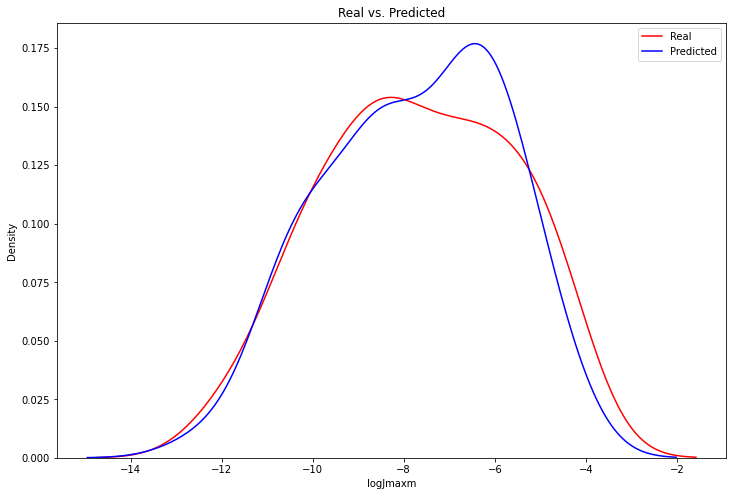

In [13]:
predictions = pipeline_cat.predict(X_test)
DistributionPlot(y_test, predictions, "Real", "Predicted", "Real vs. Predicted")

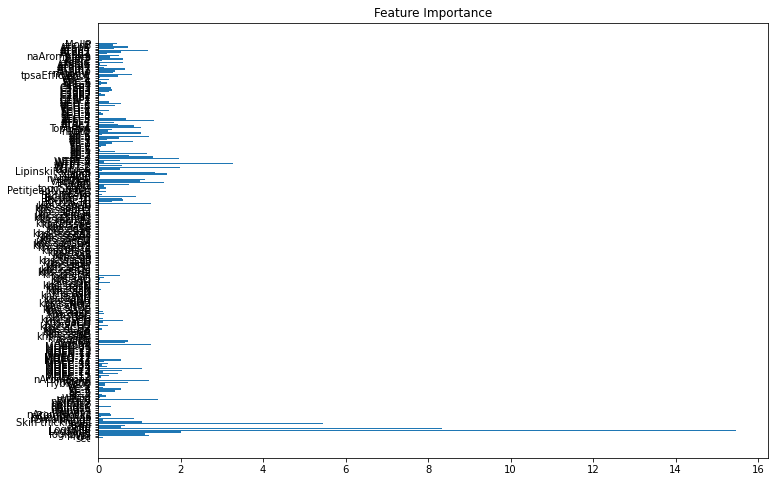

In [14]:
# # get feature importance
importance = pipeline_cat['cat'].feature_importances_

# plot feature importance
plt.figure(figsize=(12, 8))
plt.barh([x for x in X.columns], importance)
plt.title('Feature Importance')
plt.show()

In [120]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(256, input_shape=[230]))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [121]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 256)               59136     
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_63 (Dense)            (None, 128)               32896     
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_65 (Dense)            (None, 32)              

In [122]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=2)

Epoch 1/1000
12/12 - 1s - loss: 1673.0145 - val_loss: 499.4076 - 521ms/epoch - 43ms/step
Epoch 2/1000
12/12 - 0s - loss: 385.8916 - val_loss: 35.9990 - 41ms/epoch - 3ms/step
Epoch 3/1000
12/12 - 0s - loss: 169.6135 - val_loss: 86.1718 - 56ms/epoch - 5ms/step
Epoch 4/1000
12/12 - 0s - loss: 62.1212 - val_loss: 25.0216 - 41ms/epoch - 3ms/step
Epoch 5/1000
12/12 - 0s - loss: 38.7720 - val_loss: 7.1098 - 42ms/epoch - 4ms/step
Epoch 6/1000
12/12 - 0s - loss: 21.0600 - val_loss: 4.1513 - 40ms/epoch - 3ms/step
Epoch 7/1000
12/12 - 0s - loss: 17.3253 - val_loss: 3.5921 - 39ms/epoch - 3ms/step
Epoch 8/1000
12/12 - 0s - loss: 11.7665 - val_loss: 2.1009 - 43ms/epoch - 4ms/step
Epoch 9/1000
12/12 - 0s - loss: 8.2292 - val_loss: 1.9292 - 42ms/epoch - 4ms/step
Epoch 10/1000
12/12 - 0s - loss: 7.4137 - val_loss: 1.6256 - 41ms/epoch - 3ms/step
Epoch 11/1000
12/12 - 0s - loss: 6.6882 - val_loss: 1.2592 - 39ms/epoch - 3ms/step
Epoch 12/1000
12/12 - 0s - loss: 6.1957 - val_loss: 3.0411 - 43ms/epoch - 4ms

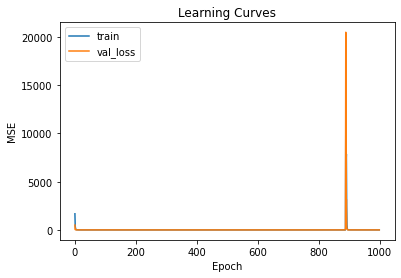

In [123]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [124]:
predictions = model.predict(X_test)

# MAE, MSE, RMSE
print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(mean_squared_error(y_test, predictions)))
print("RMSE: {}\n".format(mean_squared_error(y_test, predictions, squared=False)))
print("MAPE: {}".format(mean_absolute_percentage_error(y_test, predictions)))

3/3 [==============================] - 0s 2ms/step
MAE: 0.6309239204607572
MSE: 0.8142163143545901
RMSE: 0.9023393565364364

MAPE: 0.07957357536550842
